# YOLOv5 Litter Detection

## Environment

Inspect the hardware and software being used.

In [2]:
import torch

ver = torch.__version__
device = torch.cuda.get_device_properties(0) if torch.cuda.is_available() else "CPU"
print(f"torch v{ver} using {device}")

torch v1.10.0+cu113 using _CudaDeviceProperties(name='NVIDIA GeForce RTX 3060', major=8, minor=6, total_memory=12287MB, multi_processor_count=28)


## Train

Train the YOLOv5s model using the pre-trained weights.

In [6]:
%%time
!python yolov5/train.py --img 640 --batch 32 --epochs 300 --data cfg/data.yaml --cfg cfg/yolov5s_custom.yaml --weights yolov5s.pt --name results --cache

github:  YOLOv5 is out of date by 4 commits. Use `git pull` or `git clone https://github.com/ultralytics/yolov5` to update.
Weights & Biases: run 'pip install wandb' to automatically track and visualize YOLOv5  runs (RECOMMENDED)
Plotting labels... 

autoanchor: Analyzing anchors... anchors/target = 3.69, Best Possible Recall (BPR) = 1.0000
Optimizer stripped from yolov5\runs\train\results4\weights\last.pt, 14.5MB
Optimizer stripped from yolov5\runs\train\results4\weights\best.pt, 14.5MB
Wall time: 15min 19s


train: weights=yolov5s.pt, cfg=cfg/yolov5s_custom.yaml, data=cfg/data.yaml, hyp=yolov5\data\hyps\hyp.scratch.yaml, epochs=300, batch_size=32, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single_cls=False, adam=False, sync_bn=False, workers=8, project=yolov5\runs\train, name=results, exist_ok=False, quad=False, linear_lr=False, label_smoothing=0.0, patience=100, freeze=0, save_period=-1, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
YOLOv5  2021-11-9 torch 1.10.0+cu113 CUDA:0 (NVIDIA GeForce RTX 3060, 12288MiB)

hyperparameters: lr0=0.01, lrf=0.1, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_gamma=0.0, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, degrees=0.0, translate=0.1, scale=0.5, shear=0.0, perspecti

## Visualise

Inspect the training results.

In [ ]:
# Run the command "Python: Launch TensorBoard" if you're using VS Code.
%load_ext tensorboard
%tensorboard --logdir yolov5/runs

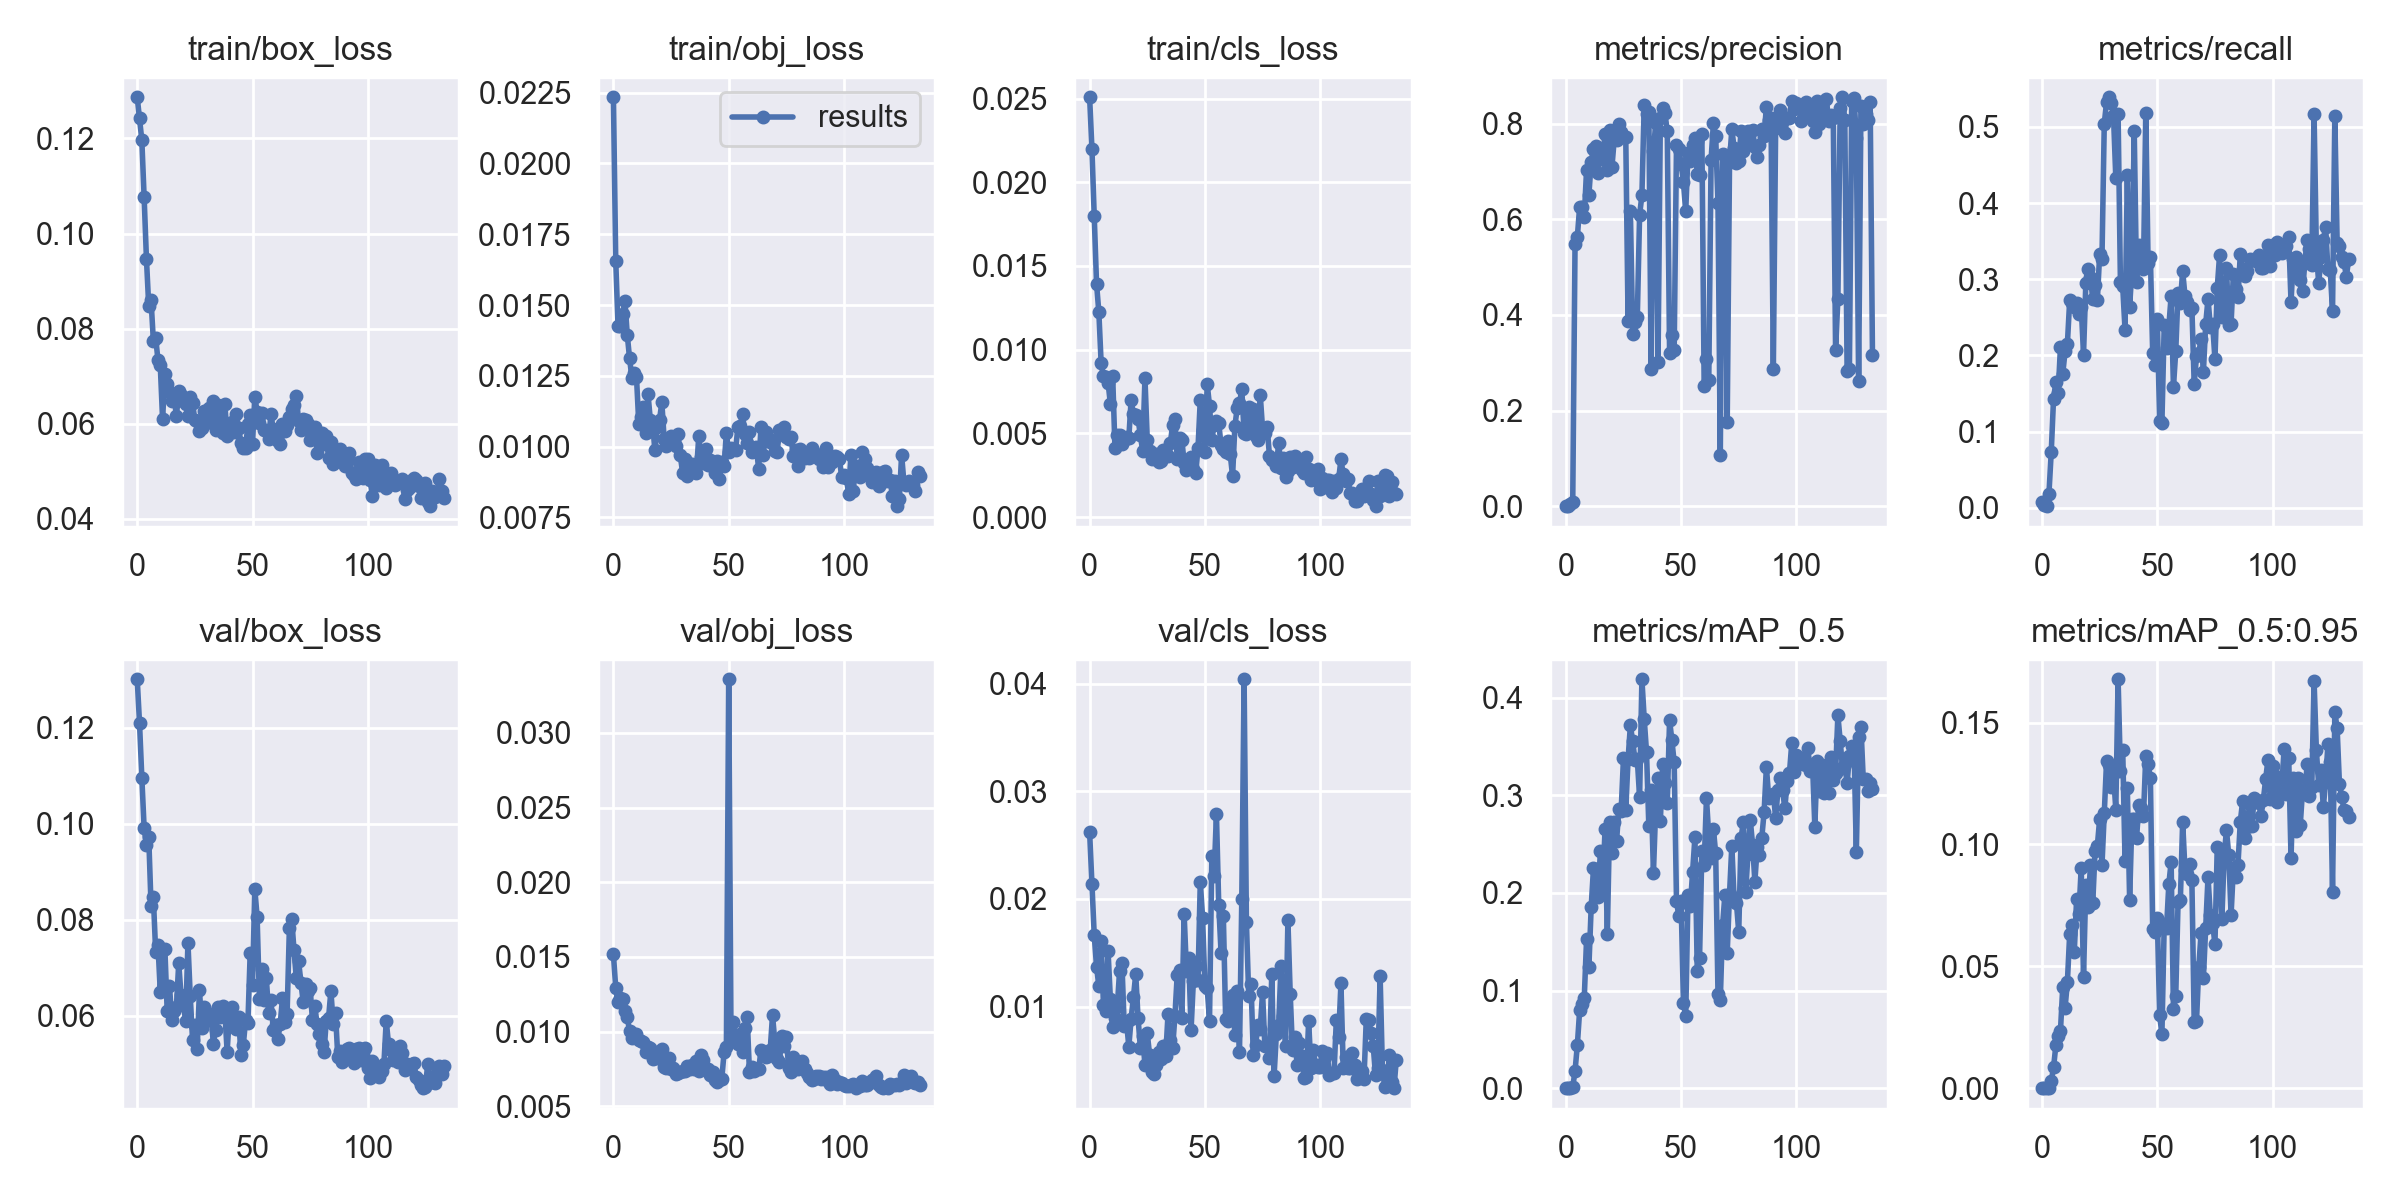

In [10]:
from IPython.display import Image
Image(filename="yolov5/runs/train/results/results.png")

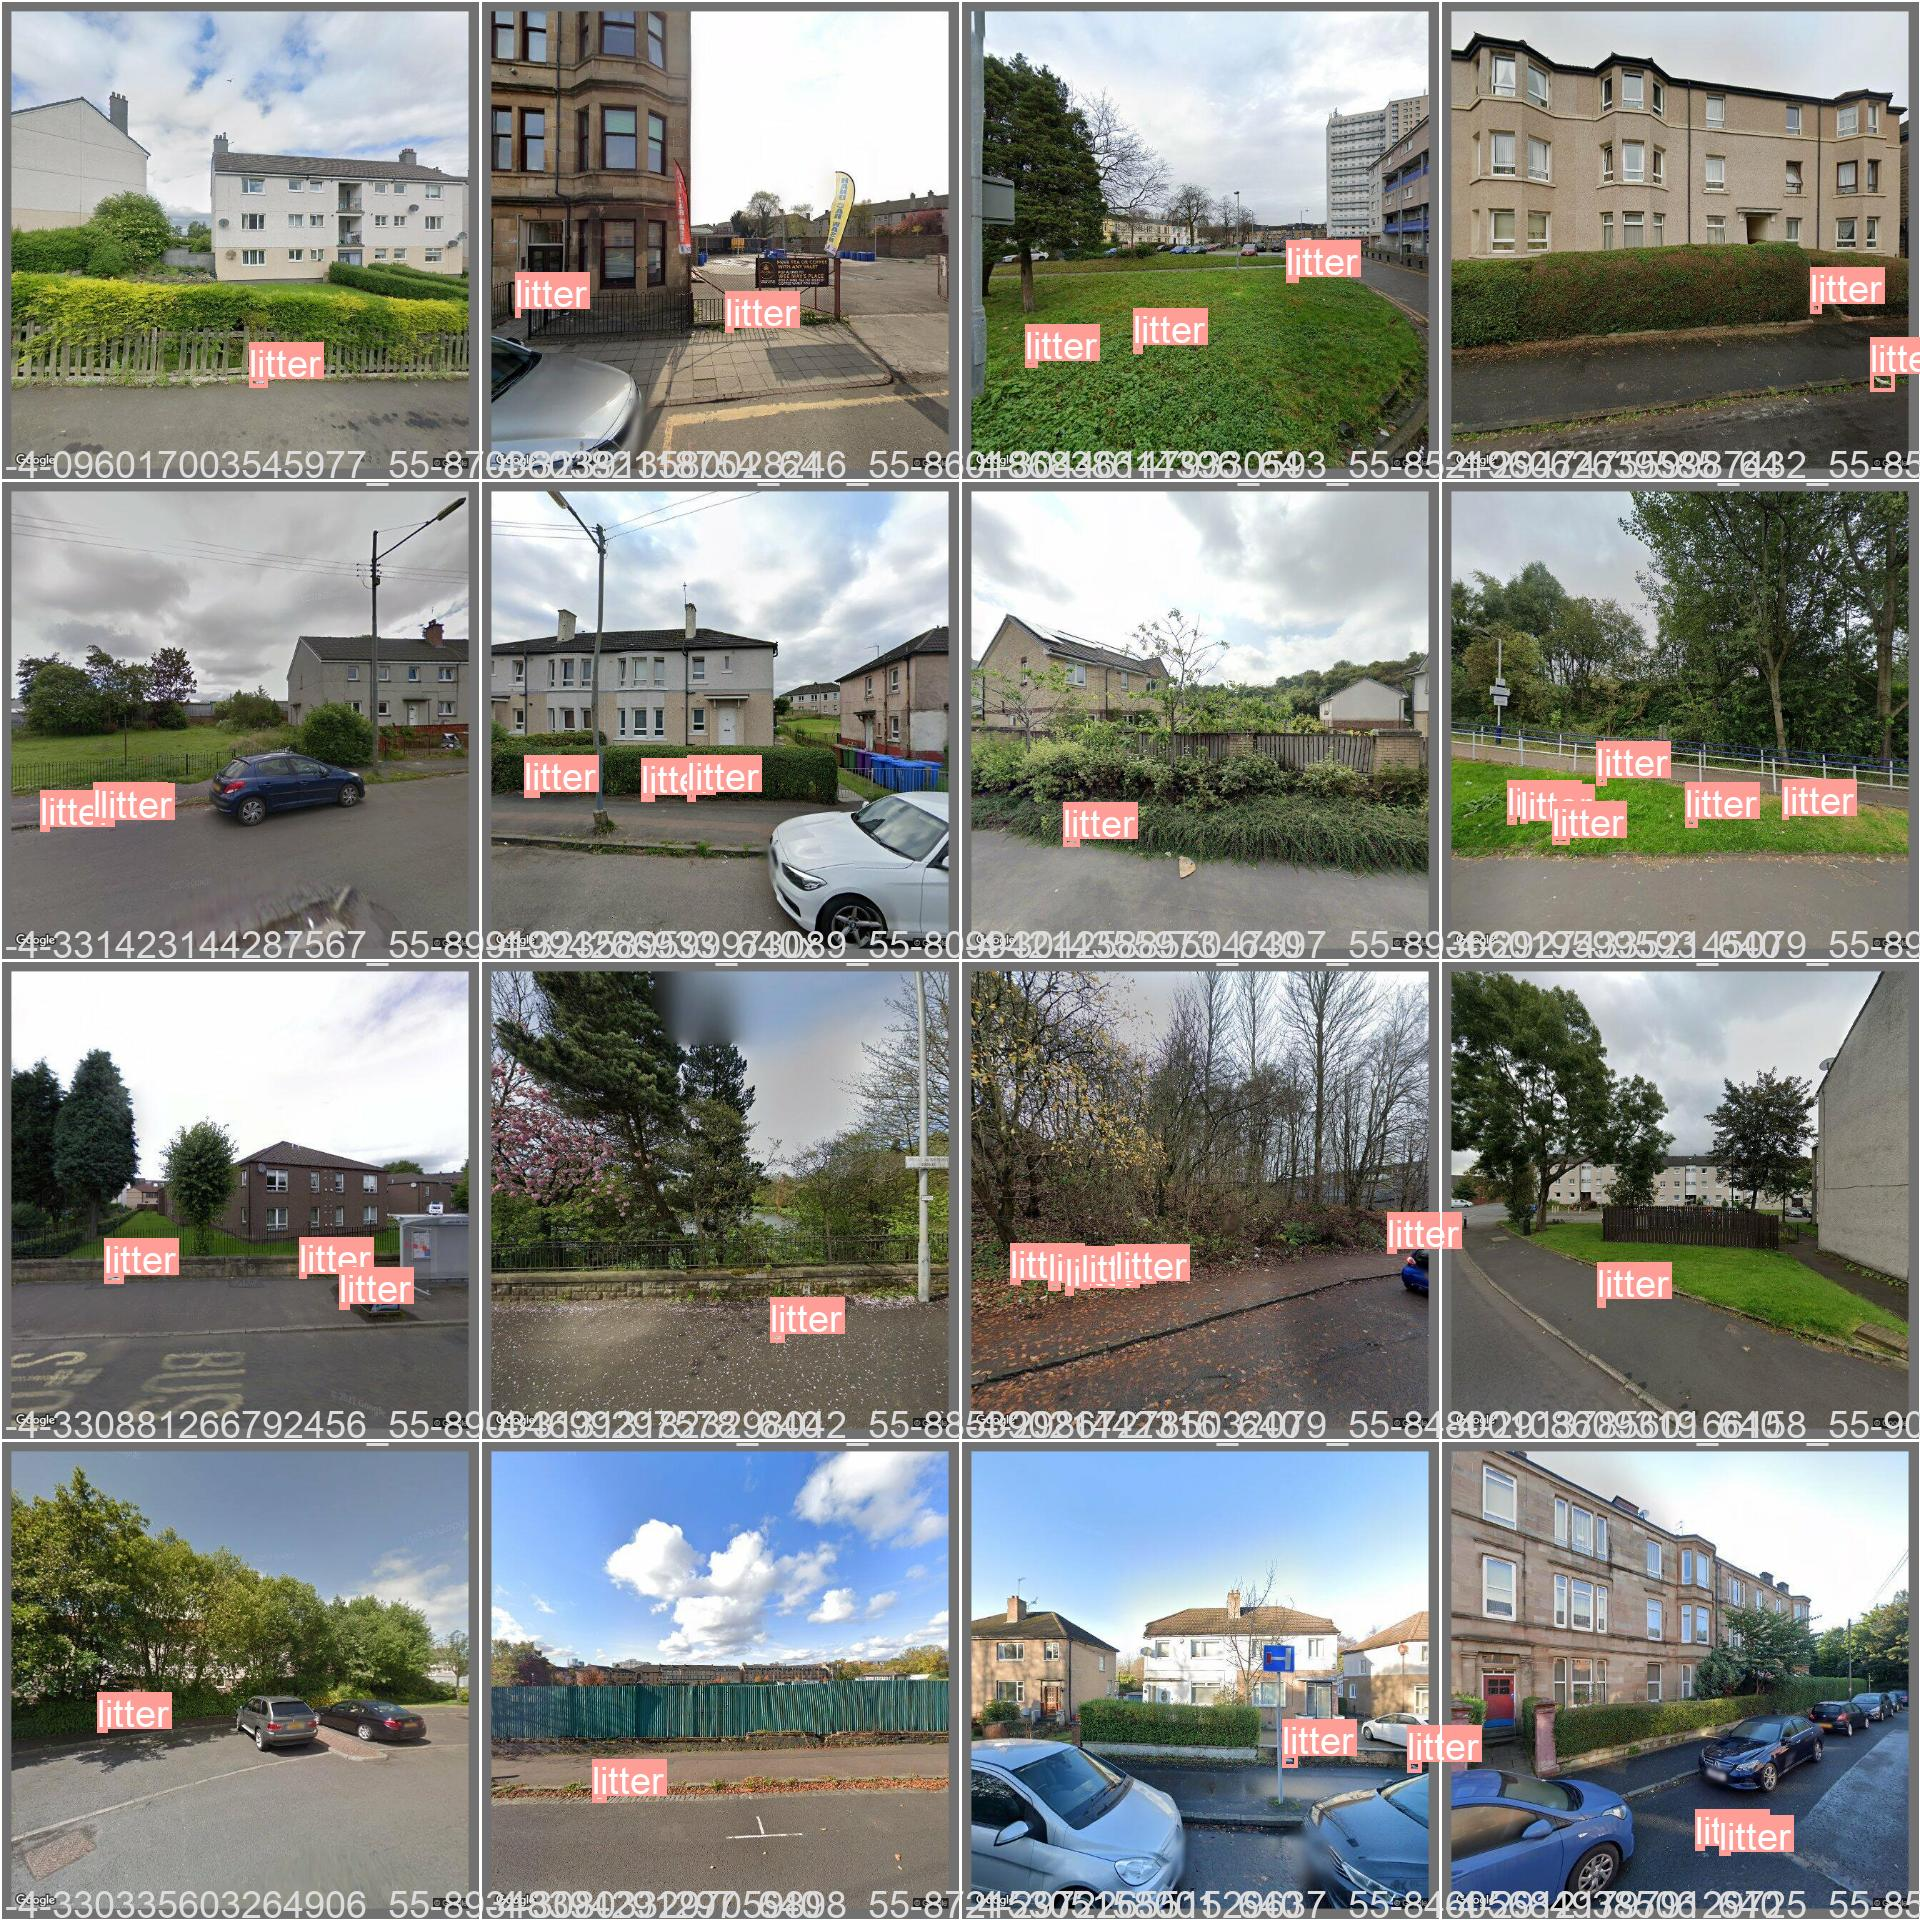

In [11]:
from IPython.display import Image
Image(filename="yolov5/runs/train/results/val_batch0_labels.jpg")

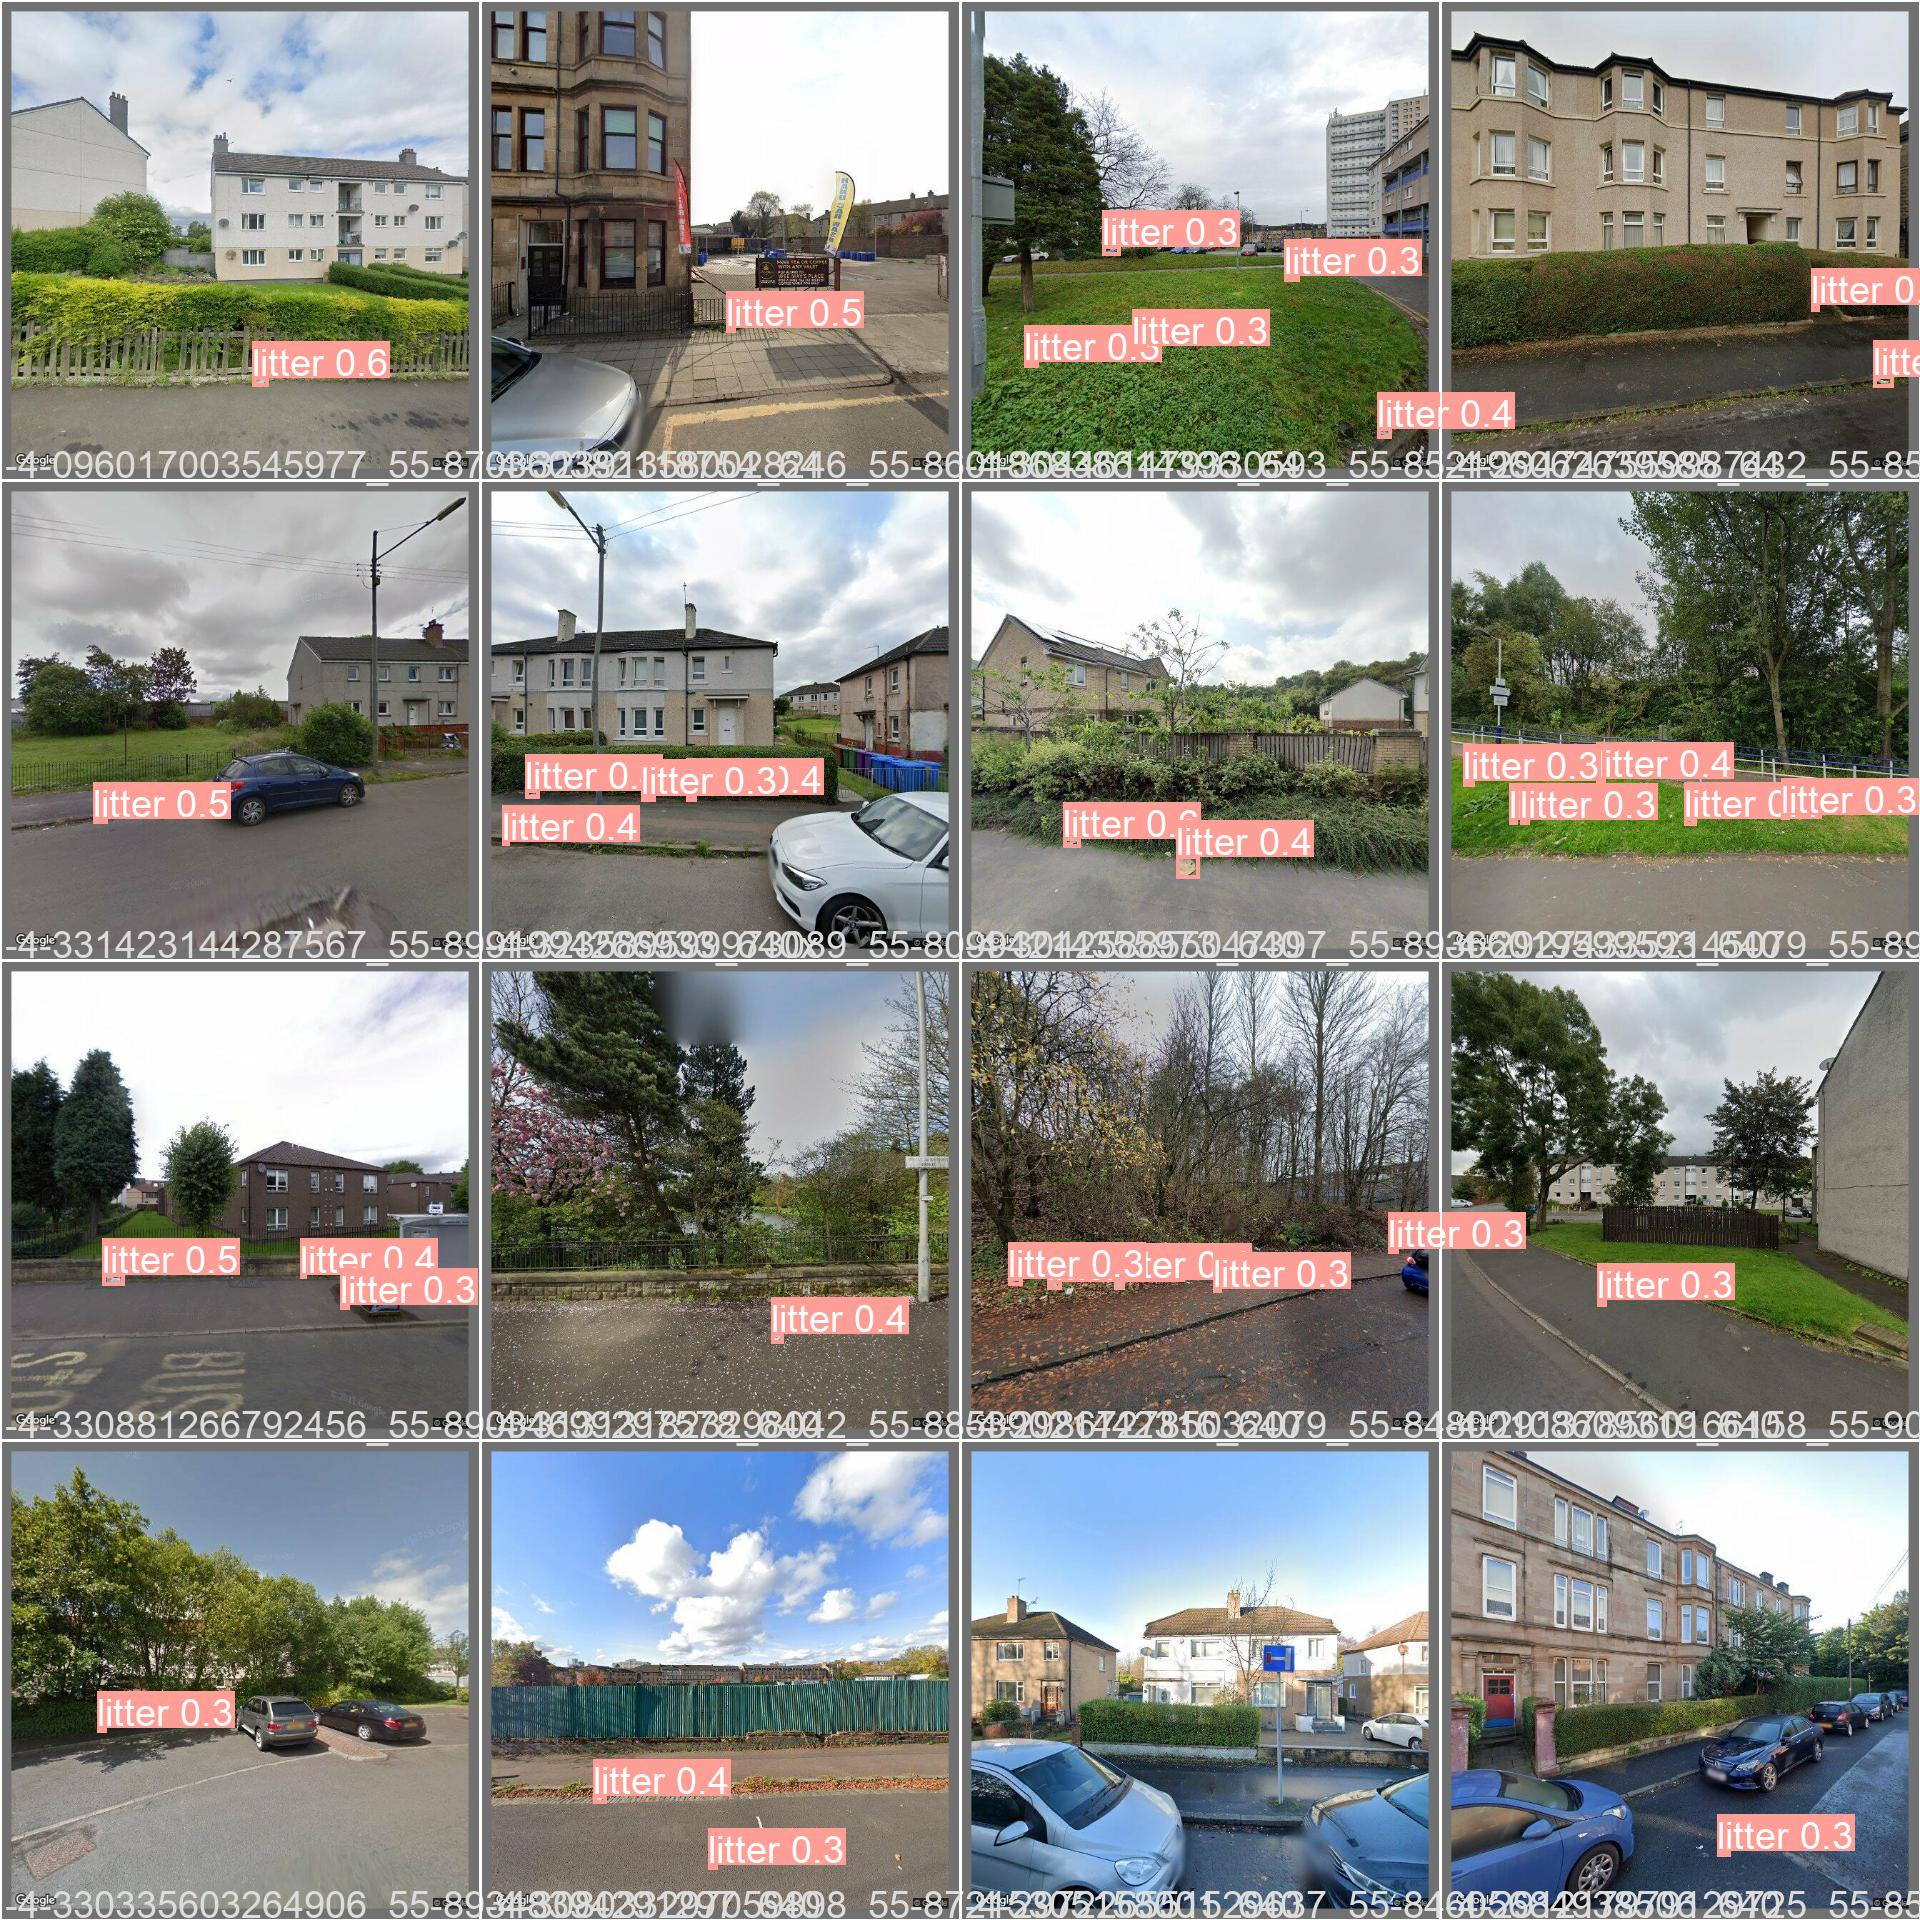

In [12]:
from IPython.display import Image
Image(filename="yolov5/runs/train/results/val_batch0_pred.jpg")

## Inference

Detect litter in the test data.

In [1]:
%%time
!python yolov5/detect.py --weights yolov5/runs/train/results/weights/best.pt --img 640 --conf 0.25 --source ../../data/models/yolov5/test/images --save-txt

Wall time: 7.27 s


detect: weights=['yolov5/runs/train/results/weights/best.pt'], source=../../data/models/yolov5/test/images, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=True, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=yolov5\runs\detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False
YOLOv5  2021-11-9 torch 1.10.0+cu113 CUDA:0 (NVIDIA GeForce RTX 3060, 12288MiB)

Fusing layers... 
Model Summary: 213 layers, 7015519 parameters, 0 gradients, 15.8 GFLOPs
image 1/71 C:\Users\Gary Blackwood\dev\glasgow-litter\data\models\yolov5\test\images\-4-104349864209646_55-85053959727513_640x640_jpg.rf.dde33c8f47a8d4818744dee48bd0dad1.jpg: 640x640 1 litter, Done. (0.009s)
image 2/71 C:\Users\Gary Blackwood\dev\glasgow-litter\data\models\yolov5\test\images\-4-125841824002213_55-84296026988723_640x640_jpg.rf.d552c7b84b1eb

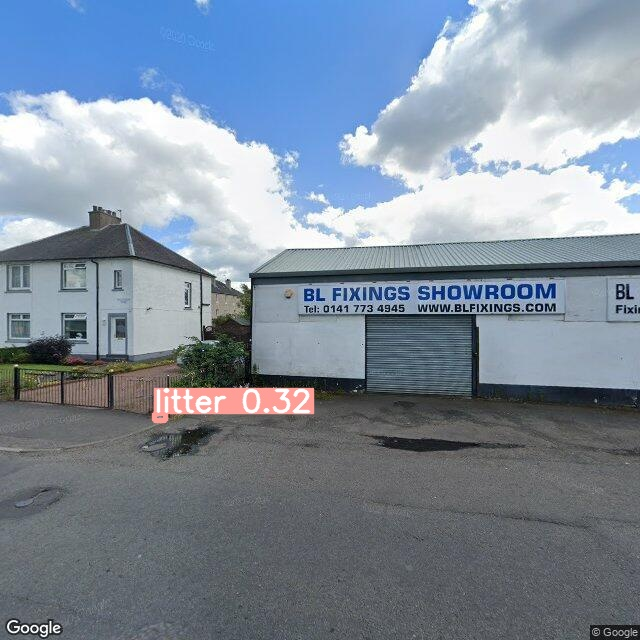

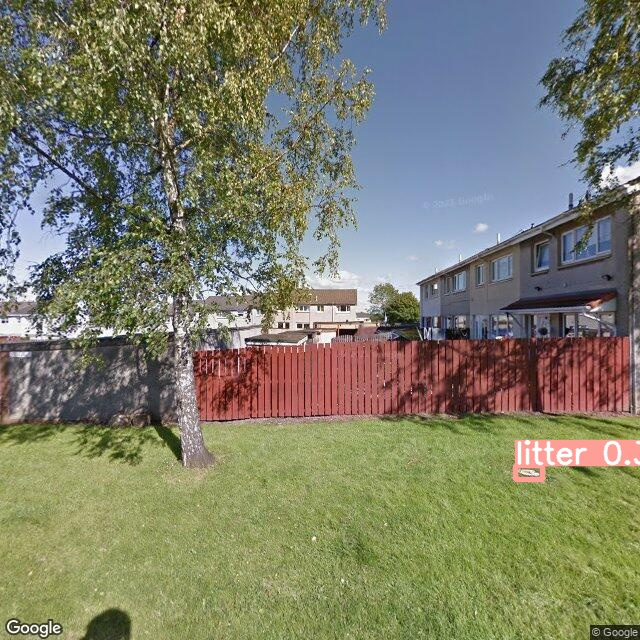

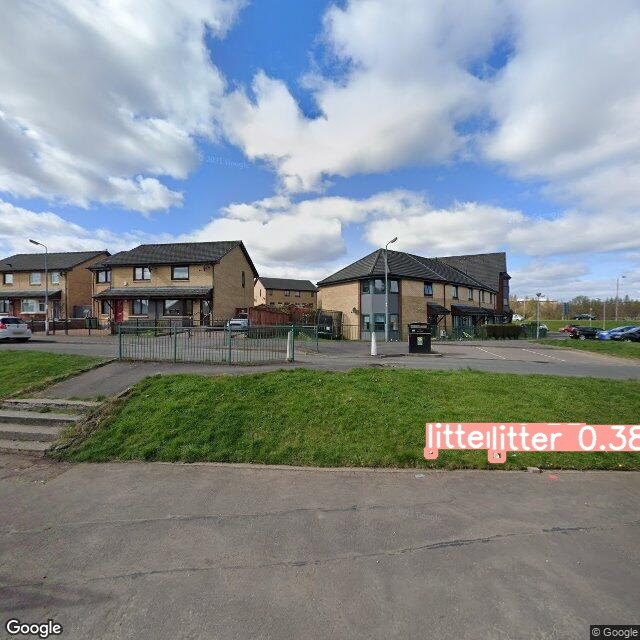

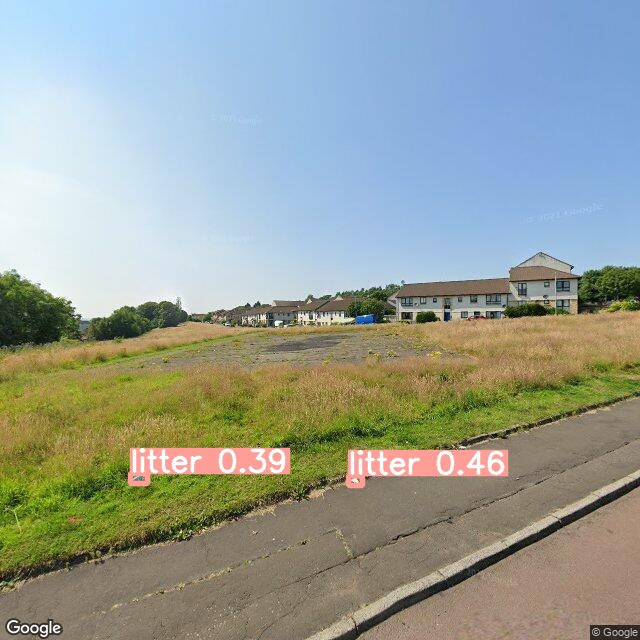

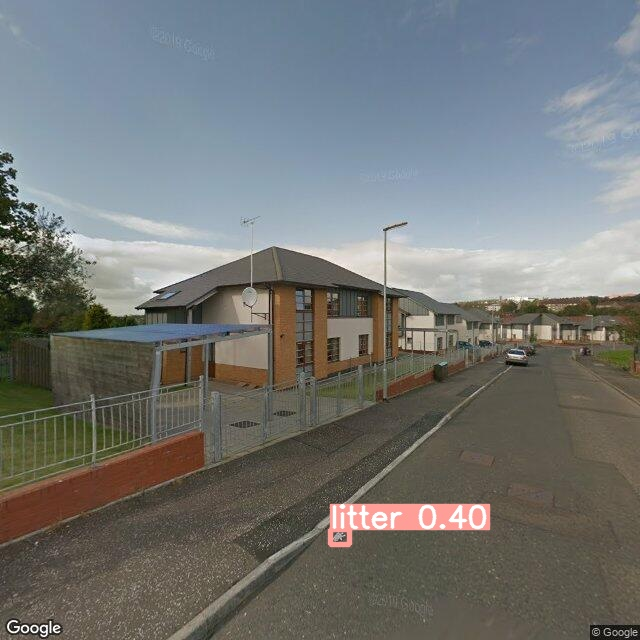

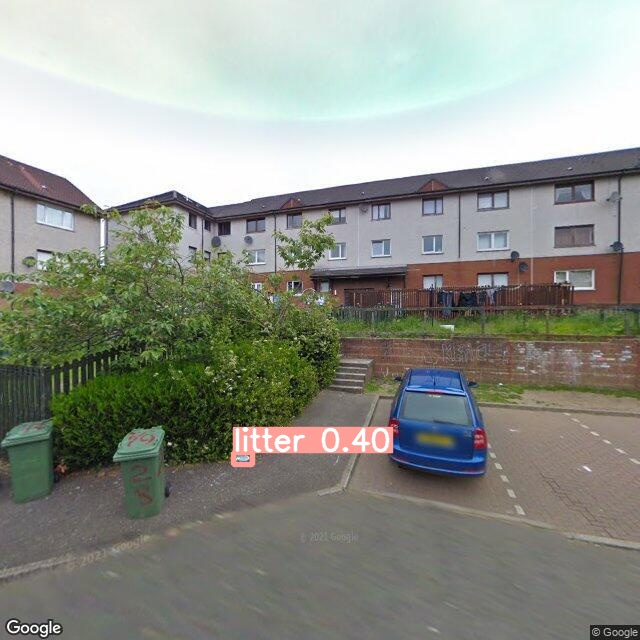

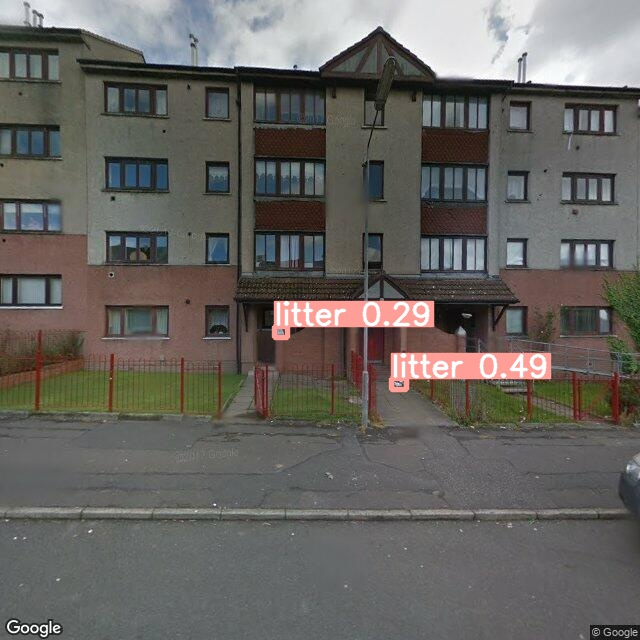

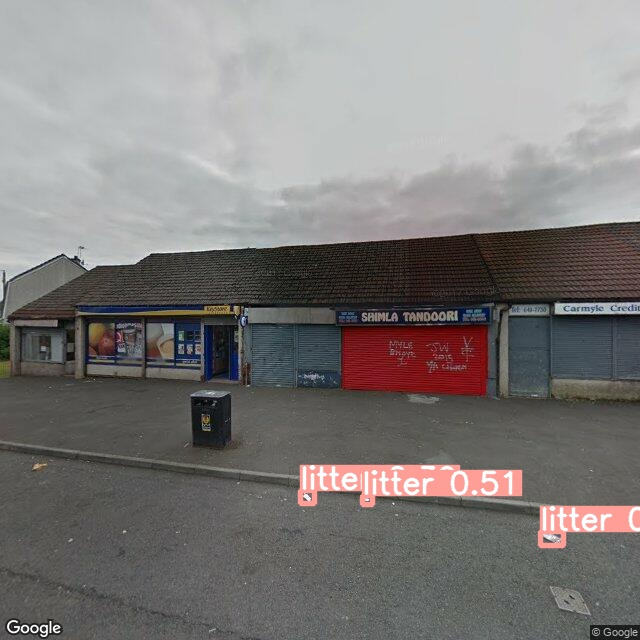

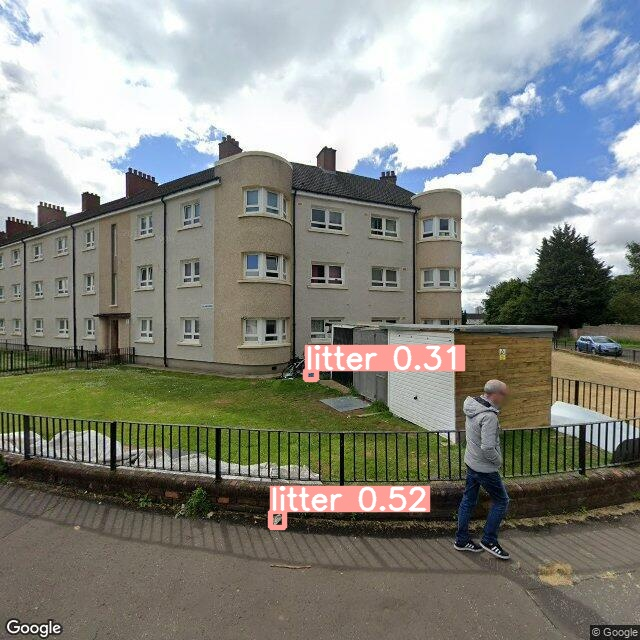

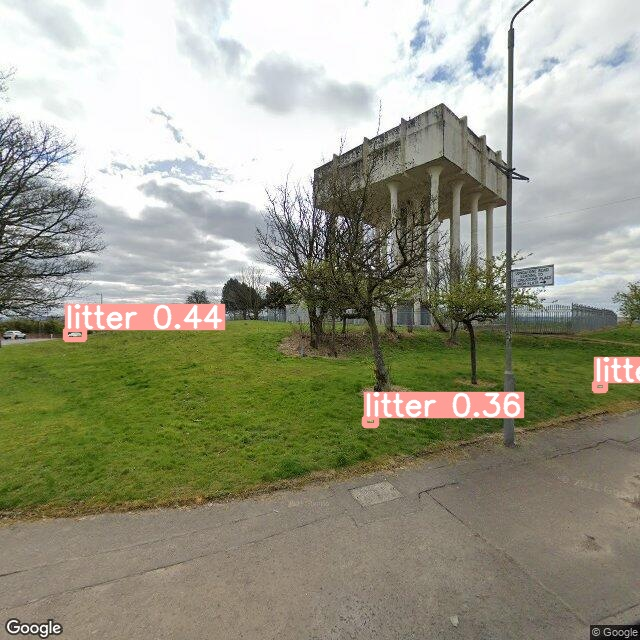

In [8]:
import glob
from IPython.display import Image, display

files = glob.glob("yolov5/runs/detect/exp/*.jpg")
for fname in files[:10]:
    display(Image(fname))
    print("\n")

In [18]:
%%time
!python yolov5/val.py --img 640 --batch 32 --data cfg/data.yaml --weights yolov5/runs/train/results/weights/best.pt --name results

Wall time: 27.9 s


val: data=cfg/data.yaml, weights=['yolov5/runs/train/results/weights/best.pt'], batch_size=32, imgsz=640, conf_thres=0.001, iou_thres=0.6, task=val, device=, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=yolov5\runs\val, name=results, exist_ok=False, half=False, dnn=False
YOLOv5  2021-11-9 torch 1.10.0+cu113 CUDA:0 (NVIDIA GeForce RTX 3060, 12288MiB)

Fusing layers... 
Model Summary: 213 layers, 7015519 parameters, 0 gradients, 15.8 GFLOPs

val: Scanning '..\..\data\models\yolov5\valid\labels' images and labels...:   0%|          | 0/141 [00:00<?, ?it/s]
val: Scanning '..\..\data\models\yolov5\valid\labels' images and labels...1 found, 0 missing, 0 empty, 0 corrupted:   1%|          | 1/141 [00:02<06:15,  2.68s/it]
val: Scanning '..\..\data\models\yolov5\valid\labels' images and labels...141 found, 0 missing, 0 empty, 0 corrupted: 100%|██████████| 141/141 [00:02<00:00, 52.10it/s]
val: WARNING: Cache director

In [29]:
import glob
import json

metadata = {"images": {}}
files = glob.glob("yolov5/runs/detect/exp/*.jpg")
with open("yolov5/runs/detect/exp/metadata.json", mode="w", encoding="utf8") as file:
    for path in files:
      tokens = path.split("/")
      fname = tokens[-1].split("\\")[-1].split(".rf")[0]
      if fname.startswith("-"):
        fname = fname[1:]
        fname = "-" + fname.replace("-", ".")
      else:
        fname = fname.replace("-", ".")
      fname = fname.replace("_jpg", ".jpg")
      metadata["images"][fname] = {"path": "models/yolov5/" + path}
    file.write(json.dumps(metadata))